# imports

In [1]:
# system & general:
from os import listdir, mkdir, makedirs
from os.path import isfile, join, isdir, exists
import cPickle as pickle
import os
import re
import time

# data analysis and statistics:
import pandas as pd
import numpy as np
from scipy import stats
import random
from scipy.stats import pearsonr, fisher_exact, mannwhitneyu, sem
import math
from scipy.spatial.distance import braycurtis, pdist, euclidean

# figures:
import matplotlib as mpl
# mpl.use('Agg')

import matplotlib.pyplot as plt
from matplotlib.backends.backend_pdf import PdfPages
import seaborn as sns 
from matplotlib.ticker import FormatStrFormatter
from matplotlib import gridspec
# from PNPChip.ForPaper.Figures.nature_guidline_utils import m2inch
import matplotlib.cm as cm
from mpl_toolkits.axes_grid1 import make_axes_locatable

# my functions:
from ShaniBA.myplots import roundup, rounddown, find_decimal_fold, percentile_cut_off, rarefaction_calc, rarefaction_plot, adjusted_roundup
from ShaniBA.MyFunctionsShani import *
from ShaniBA.GeneralFeaturePhenotypeInteractions.Feature_phenotype_functions import * 
from ShaniBA.TCR_microbiome_interactions.TCR_microbiome_interactions_functions import *
from ShaniBA.TCR_microbiome_interactions.TCR_microbiome_interactions_functions2 import *
from ShaniBA.SampleLists.SampleFileFunctions import *
from ShaniBA.PhenotypicData.PhenotypeGenerationFunctions import *
from ShaniBA.CardioProject.CardioFunctions import *
from ShaniBA.PredictionPipeline.PredictionFunctions import *
from ShaniBA.TCR_feature_generation.SubsamplingFunctions import *
from ShaniBA.CardioProject.Figures.GeneralFigureFunctions import *
from ShaniBA.CardioProject.Figures.Figure1 import *

#ML:
from sklearn.linear_model import LogisticRegression, LinearRegression


stop
done1
stop
done
done
stop
end of function!!!


/usr/wisdom/python/lib/python2.7/site-packages/matplotlib/__init__.py:1357: UserWarning:  This call to matplotlib.use() has no effect
because the backend has already been chosen;
matplotlib.use() must be called *before* pylab, matplotlib.pyplot,
or matplotlib.backends is imported for the first time.

  warnings.warn(_use_error_msg)


# Definitions

In [2]:
#####path definitions:
MyPath = '/net/mraid08/export/genie/Lab/Personal/ShaniBAF'

with open('/net/mraid08/export/genie/Lab/Personal/ShaniBAF/Sample files/BD lists/PNP530', 'rb') as fp:
    PNP530 = pickle.load(fp)
with open('/net/mraid08/export/genie/Lab/Personal/ShaniBAF/Sample files/BD lists/Cardio126', 'rb') as fp:
    Cardio126 = pickle.load(fp)
PNP530Cardio126 = PNP530 + Cardio126

FIG5_DIR = '/net/mraid08/export/genie/Lab/Personal/ShaniBAF/Presentations and Manuscripts/CardioTCR paper/FigureDraft_Jan19/\
Fig5_clinicalPhens/'
PRED_RESULTS_DIR='/net/mraid08/export/jafar/Microbiome/Analyses/ShaniBAF/predictions2/'
FEATURES_DIR='/net/mraid08/export/genie/Lab/Personal/ShaniBAF/TCR_real_data/Predictions/featureDFs/'
SAMPLE_LIST_DIR='/net/mraid08/export/genie/Lab/Personal/ShaniBAF/Sample files/BD lists/'
CARDIO_PHEN_DIR='/net/mraid08/export/genie/Lab/Personal/ShaniBAF/TCR_real_data/CardioSamples/phenotypicData/'
CLUSTER_ANALYSIS_DIR='/net/mraid08/export/jafar/Microbiome/Analyses/ShaniBAF/sharingAnalysis/seqClusters_allProd_maxdist1/'

##### general definitions:
pd.set_option('display.expand_frame_repr', False)
pd.set_option('display.width', 1000)
np.set_printoptions(precision=4, linewidth=200)

cdate = str(time.strftime("%d%m%Y"))
cdate

'26032019'

In [3]:
PRED_RESULTS_DIR

'/net/mraid08/export/jafar/Microbiome/Analyses/ShaniBAF/predictions2/'

# general functions:

the function remove_spines was copied to GenderalFigureFunctions.py

# general settings

## figure definitions

In [4]:
def set_fig5_definitions():
    params = {
   'axes.labelsize': 16,
   'font.size': 12,
   'legend.fontsize': 14,
    'axes.titlesize':16,
    'axes.titleweight':'bold',
   'xtick.labelsize': 14,
   'ytick.labelsize': 14,
   'text.usetex': False,
#    'figure.figsize': [m2inch(183), m2inch(247)],#[4.5, 4.5]
#    'figure.dpi': 300,
   'xtick.direction':'out'}


    mpl.rcParams.update(params)
    mpl.rcParams['axes.linewidth'] = 0.5
    mpl.rcParams['axes.edgecolor'] = 'black'
    mpl.rcParams['axes.facecolor'] = 'white'
    mpl.rcParams['xtick.direction'] = 'out'
    mpl.rcParams['xtick.minor.pad'] = 4

    return

In [5]:
mpl.rcParams.keys()

[u'agg.path.chunksize',
 u'animation.avconv_args',
 u'animation.avconv_path',
 u'animation.bitrate',
 u'animation.codec',
 u'animation.convert_args',
 u'animation.convert_path',
 u'animation.ffmpeg_args',
 u'animation.ffmpeg_path',
 u'animation.frame_format',
 u'animation.html',
 u'animation.mencoder_args',
 u'animation.mencoder_path',
 u'animation.writer',
 u'axes.axisbelow',
 u'axes.edgecolor',
 u'axes.facecolor',
 u'axes.formatter.limits',
 u'axes.formatter.use_locale',
 u'axes.formatter.use_mathtext',
 u'axes.formatter.useoffset',
 u'axes.grid',
 u'axes.grid.axis',
 u'axes.grid.which',
 u'axes.hold',
 u'axes.labelcolor',
 u'axes.labelpad',
 u'axes.labelsize',
 u'axes.labelweight',
 u'axes.linewidth',
 u'axes.prop_cycle',
 u'axes.spines.bottom',
 u'axes.spines.left',
 u'axes.spines.right',
 u'axes.spines.top',
 u'axes.titlesize',
 u'axes.titleweight',
 u'axes.unicode_minus',
 u'axes.xmargin',
 u'axes.ymargin',
 u'axes3d.grid',
 u'backend',
 u'backend.qt4',
 u'backend.qt5',
 u'backend_fallback',
 u'boxplot.bootstrap',
 u'boxplot.boxprops.color',
 u'boxplot.boxprops.linestyle',
 u'boxplot.boxprops.linewidth',
 u'boxplot.capprops.color',
 u'boxplot.capprops.linestyle',
 u'boxplot.capprops.linewidth',
 u'boxplot.flierprops.color',
 u'boxplot.flierprops.linestyle',
 u'boxplot.flierprops.linewidth',
 u'boxplot.flierprops.marker',
 u'boxplot.flierprops.markeredgecolor',
 u'boxplot.flierprops.markerfacecolor',
 u'boxplot.flierprops.markersize',
 u'boxplot.meanline',
 u'boxplot.meanprops.color',
 u'boxplot.meanprops.linestyle',
 u'boxplot.meanprops.linewidth',
 u'boxplot.medianprops.color',
 u'boxplot.medianprops.linestyle',
 u'boxplot.medianprops.linewidth',
 u'boxplot.notch',
 u'boxplot.patchartist',
 u'boxplot.showbox',
 u'boxplot.showcaps',
 u'boxplot.showfliers',
 u'boxplot.showmeans',
 u'boxplot.vertical',
 u'boxplot.whiskerprops.color',
 u'boxplot.whiskerprops.linestyle',
 u'boxplot.whiskerprops.linewidth',
 u'boxplot.whiskers',
 u'contour.corner_mask',
 u'contour.negative_linestyle',
 u'datapath',
 u'docstring.hardcopy',
 u'errorbar.capsize',
 u'examples.directory',
 u'figure.autolayout',
 u'figure.dpi',
 u'figure.edgecolor',
 u'figure.facecolor',
 u'figure.figsize',
 u'figure.frameon',
 u'figure.max_open_warning',
 u'figure.subplot.bottom',
 u'figure.subplot.hspace',
 u'figure.subplot.left',
 u'figure.subplot.right',
 u'figure.subplot.top',
 u'figure.subplot.wspace',
 u'figure.titlesize',
 u'figure.titleweight',
 u'font.cursive',
 u'font.family',
 u'font.fantasy',
 u'font.monospace',
 u'font.sans-serif',
 u'font.serif',
 u'font.size',
 u'font.stretch',
 u'font.style',
 u'font.variant',
 u'font.weight',
 u'grid.alpha',
 u'grid.color',
 u'grid.linestyle',
 u'grid.linewidth',
 u'image.aspect',
 u'image.cmap',
 u'image.composite_image',
 u'image.interpolation',
 u'image.lut',
 u'image.origin',
 u'image.resample',
 u'interactive',
 u'keymap.all_axes',
 u'keymap.back',
 u'keymap.forward',
 u'keymap.fullscreen',
 u'keymap.grid',
 u'keymap.home',
 u'keymap.pan',
 u'keymap.quit',
 u'keymap.save',
 u'keymap.xscale',
 u'keymap.yscale',
 u'keymap.zoom',
 u'legend.borderaxespad',
 u'legend.borderpad',
 u'legend.columnspacing',
 u'legend.edgecolor',
 u'legend.facecolor',
 u'legend.fancybox',
 u'legend.fontsize',
 u'legend.framealpha',
 u'legend.frameon',
 u'legend.handleheight',
 u'legend.handlelength',
 u'legend.handletextpad',
 u'legend.isaxes',
 u'legend.labelspacing',
 u'legend.loc',
 u'legend.markerscale',
 u'legend.numpoints',
 u'legend.scatterpoints',
 u'legend.shadow',
 u'lines.antialiased',
 u'lines.color',
 u'lines.dash_capstyle',
 u'lines.dash_joinstyle',
 u'lines.linestyle',
 u'lines.linewidth',
 u'lines.marker',
 u'lines.markeredgewidth',
 u'lines.markersize',
 u'lines.solid_capstyle',
 u'lines.solid_joinstyle',
 u'markers.fillstyle',
 u'mathtext.bf',
 u'mathtext.cal',
 u'mathtext.default',
 u'mathtext.fallback_to_cm',
 u'mathtext.fontset',
 u'mathtext.it',
 u'mathtext.rm',
 u'mathtext.sf',
 u'mathtext.tt',
 u'nbagg.transpar

In [6]:
set_fig5_definitions()

## figure design

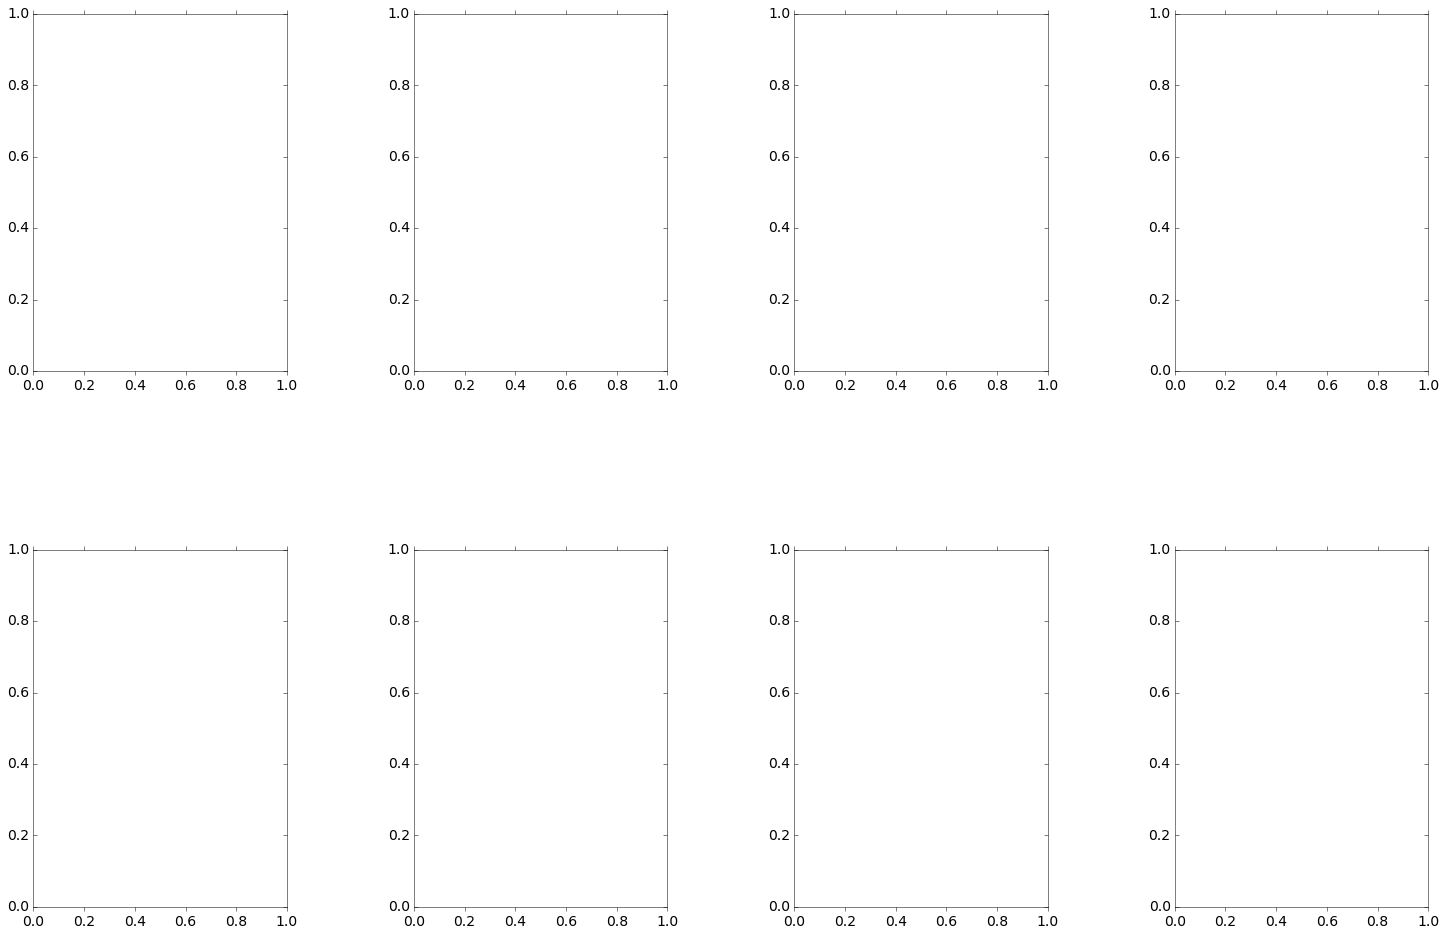

In [7]:
fig = plt.figure(figsize=(25, 16))
gs0 = gridspec.GridSpec(2, 4, wspace=0.5, hspace=0.5)

### A:
ax1 = plt.Subplot(fig, gs0[0, 0])
fig.add_subplot(ax1)

ax2 = plt.Subplot(fig, gs0[0, 1])
fig.add_subplot(ax2)

ax3 = plt.Subplot(fig, gs0[0, 2])
fig.add_subplot(ax3)

ax4 = plt.Subplot(fig, gs0[0, 3])
fig.add_subplot(ax4)

### B:
ax5 = plt.Subplot(fig, gs0[1, 0])
fig.add_subplot(ax5)

ax6 = plt.Subplot(fig, gs0[1, 1])
fig.add_subplot(ax6)

ax7 = plt.Subplot(fig, gs0[1, 2])
fig.add_subplot(ax7)

ax8 = plt.Subplot(fig, gs0[1, 3])
fig.add_subplot(ax8)


plt.show()

# plot functions

## fig 5a: roc+PR curve for clinical phenotype prediction:

In [8]:
def plot_phen_prediction_ROC_PR(ax,phen,pred_dir,pVal):
    
    #get pred_proba data for phenotype
    dir2 = PRED_RESULTS_DIR + 'Cardio126_diseasePhenotypes/' + pred_dir
    try:
        phen_pred_proba = pd.read_pickle(dir2 + 'predictions_df.pkl').astype('float').rename(columns={phen:'pred_proba'})
    except:
        phen_pred_proba = pd.read_pickle(dir2 + 'predictions_df.pkl').astype('float').rename(columns={phen.replace(' ',''):'pred_proba'})
    print 'phen_pred_proba.columns:'
    print phen_pred_proba.columns
    phen_pred_proba=pd.DataFrame(phen_pred_proba['pred_proba'])
    print phen_pred_proba.head()
    
    # get phenotype data
    phen_file = CARDIO_PHEN_DIR+phen.replace(' ','')+'.xlsx'
    phenDF = pd.read_excel(phen_file).dropna().set_index('BD').astype('float')

    merged = pd.merge(phenDF, phen_pred_proba, how='inner', left_index=True, right_index=True)

    print 'merged'
    print merged.head()

    # #plot:
    pos_label = 1
    ax, inset_axes,roc_auc, pr_auc, prevalence = plot_ROC_PR_AUC(y=pd.DataFrame(merged[phen.replace(' ','')]), y_pred_df=pd.DataFrame(merged['pred_proba']),
                                    ax=ax, color1='darkred', color2='grey', ticklabelsize=mpl.rcParams['xtick.labelsize'],
                                      textsize=mpl.rcParams['font.size'], labelsize=mpl.rcParams['axes.labelsize'], add_texts=False)
    ax.annotate('ROC AUC=%s\nObserved p=%s\nPR AUC=%s' % (round(roc_auc, 3), pVal, round(pr_auc, 2)), xy=(0.04, 0.98), xycoords='axes fraction',
                 fontsize=mpl.rcParams['font.size'], xytext=(0, 0), textcoords='offset points', fontweight='bold', ha='left', va='top')
    ax.set_xlabel('False Positive Rate')
    ax.set_ylabel('True Positive Rate')
    inset_axes.text(0.01,prevalence-0.01,'Prevalence=%s' %prevalence,transform=inset_axes.transAxes,ha='left',va='top',
                    fontsize=mpl.rcParams['font.size']-2)
    
    return ax



def plot_5a(ax1,ax2,ax3,ax4):
    
    ### plot ROC+PR CURVES:
    subplot_list=[(ax1,'AdmissionAspirin','Chronic Aspirin',
                   'AdmissionAspirinBetaBlockersDischargeMerformin_XGB100_randomSearch_25_byNewX_AUC/','0.0005'),
                 (ax2,'Acute Aspirin','Acute Aspirin',
                  'Acute_medication_phenotypes_XGB50_randomSearch_25_bynewXonlySeqsCardio126040085noNans_optByAUC/','0.002'),
                 (ax3,'AdmissionBetaBlockers','Chronic Beta Blockers',
                  'AdmissionAspirinBetaBlockersDischargeMerformin_XGB100_randomSearch_25_byNewX_kappa/','0.0025'),
                 (ax4,'Acute Ticagrelor','Acute Ticagrelor',
                 'Acute_medication_phenotypes_XGB50_randomSearch_25_bynewXonlySeqsCardio126040085noNans_optByAUC/',0.004)]
    
    for item in subplot_list:
        print item[1]
        phen_niceName=item[2]
        ax=plot_phen_prediction_ROC_PR(ax=item[0],phen=item[1],pred_dir=item[3],pVal=item[4])
        
        ax.set_title(phen_niceName,fontsize='xx-large', y=1.05)
        
    return ax1,ax2,ax3,ax4

## fig 5b: shap graphs:

In [9]:
def plot5b(fig,ax5,ax6,ax7,ax8):
    
    subplot_list=[
#         (ax5,'Admission Aspirin','Chronic Aspirin',
#                    'AdmissionAspirinBetaBlockersDischargeMerformin_XGB100_randomSearch_25_byNewX_AUC/',True),
                 (ax6,'Acute Aspirin','Acute Aspirin',
                  'Acute_medication_phenotypes_XGB50_randomSearch_25_bynewXonlySeqsCardio126040085noNans_optByAUC/',True),
#                  (ax7,'Admission BetaBlockers','Chronic Beta Blockers',
#                   'AdmissionAspirinBetaBlockersDischargeMerformin_XGB100_randomSearch_25_byNewX_kappa/',True),
                 (ax8,'Acute Ticagrelor','Acute Ticagrelor',
                 'Acute_medication_phenotypes_XGB50_randomSearch_25_bynewXonlySeqsCardio126040085noNans_optByAUC/',True)
    ]
     
    
    Xfeatures_file_onlySeq='/net/mraid08/export/genie/Lab/Personal/ShaniBAF/TCR_real_data/Predictions/featureDFs/newX_onlySeqs_Cardio126_040_085_noNans.dat'
    Xfeatures_onlySeq = pd.read_pickle(Xfeatures_file_onlySeq)
    for col in Xfeatures_onlySeq.columns:
            Xfeatures_onlySeq[col] = Xfeatures_onlySeq[col].fillna(Xfeatures_onlySeq[col].median())
            
    #define parameters for shap plot:
    nTopFeatures = 10
    features_df = Xfeatures_onlySeq
    jitter = 0.1
    sample_num = None
    scalingMethod = 'perc'
    

    # ## plot ax8:
    mpl.rcParams['ytick.labelsize']=14
    mpl.rcParams['axes.labelsize']=16
        
    ###plot shap plot for each phenotype:
    for item in subplot_list:
        ax=item[0]; phen=item[1]; phen_niceName=item[2]; pred_dir=item[3]; isShap=item[4]
        print phen
    
        # load shap/coef values:
        dir2 = PRED_RESULTS_DIR + 'Cardio126_diseasePhenotypes/' + pred_dir
        if isShap:
            pred_shap = pd.read_pickle(dir2 + 'shap_values.pkl')[phen].astype('float').rename(columns={phen:'shap'})
            shap_df = pd.DataFrame(pred_shap)
            target_name = phen
            if ax==ax8: addColorBar=True
            else: addColorBar=False

            ax, fig = gen_shap_summary_to_axes(ax, fig, target_name, nTopFeatures, shap_df, features_df,
                                               jitter=jitter, sample_num=sample_num, scalingMethod=scalingMethod,
                                              addColorBar=addColorBar)
        else:
            pred_coef=pd.read_pickle(dir2 + 'coef_values.pkl')[phen].astype('float').rename(columns={phen:'coef'})
            coef_df = pd.DataFrame(pred_coef)
#             print coef_df.fillna(0).max()
            target_name = phen
    
    
        ###some more edits:
        if ax==ax5: ax.set_ylabel('Shap Value')
        else: ax.set_ylabel('')
        plt.setp(ax.get_xticklabels(), rotation=90, ha="left",
         rotation_mode="anchor", fontsize=mpl.rcParams['font.size'], fontweight='bold')
    

            
    return fig,ax5,ax6,ax7,ax8

## run within figure:

In [10]:
fig = plt.figure(figsize=(30, 10))
gs0 = gridspec.GridSpec(2, 4, wspace=0.2, hspace=0.3)

#add sub-figure letters and remove spines:
ax = plt.gca()
plt.text(0,1.01,'A',ha='right',va='bottom',transform=ax.transAxes,fontsize='xx-large',fontweight='bold')
plt.text(0,0.46,'B',ha='right',va='bottom',transform=ax.transAxes,fontsize='xx-large',fontweight='bold')
remove_spines()

### A:
ax1 = plt.Subplot(fig, gs0[0, 0])
fig.add_subplot(ax1)

ax2 = plt.Subplot(fig, gs0[0, 1])
fig.add_subplot(ax2)

ax3 = plt.Subplot(fig, gs0[0, 2])
fig.add_subplot(ax3)

ax4 = plt.Subplot(fig, gs0[0, 3])
fig.add_subplot(ax4)

ax1,ax2,ax3,ax4=plot_5a(ax1,ax2,ax3,ax4)


### B:
ax5 = plt.Subplot(fig, gs0[1, 0])
fig.add_subplot(ax5)

ax6 = plt.Subplot(fig, gs0[1, 1])
fig.add_subplot(ax6)

ax7 = plt.Subplot(fig, gs0[1, 2])
fig.add_subplot(ax7)

ax8 = plt.Subplot(fig, gs0[1, 3])
fig.add_subplot(ax8)


fig,ax5,ax6,ax7,ax8=plot5b(fig,ax5,ax6,ax7,ax8)


fig.savefig(FIG5_DIR + 'figure5_%s.png' % cdate, dpi=300)

print 'Finished figure 5!!'


plt.show()

AdmissionAspirin
phen_pred_proba.columns:
Index([u'AdmissionBetaBlockers', u'DischargeMerformin', u'pred_proba'], dtype='object')
       pred_proba
BD               
BD950    0.701651
BD951    0.222958
BD952    0.200335
BD953    0.495530
BD955    0.445686
merged
       AdmissionAspirin  pred_proba
BD                                 
BD950               0.0    0.701651
BD951               0.0    0.222958
BD952               1.0    0.200335
BD953               0.0    0.495530
BD955               0.0    0.445686
Acute Aspirin
phen_pred_proba.columns:
Index([u'Acute Clopidogrel', u'Acute PPI', u'pred_proba', u'Acute Prasugrel', u'Acute ACEI', u'Acute Statins', u'Acute Ticagrelor'], dtype='object')
       pred_proba
BD               
BD950    0.166410
BD951    0.665294
BD952    0.339251
BD953    0.097787
BD955    0.178532
merged
       AcuteAspirin  pred_proba
BD                             
BD950           1.0    0.166410
BD951           1.0    0.665294
BD952           0.0    0.339251
BD95

IOError: [Errno 2] No such file or directory: '/net/mraid08/export/genie/Lab/Personal/ShaniBAF/Presentations and Manuscripts/CardioTCR paper/FigureDraft_Jan19/Fig5_clinicalPhens/figure5_26032019.png'

In [ ]:
mpl.rcParams['ytick.labelsize']

#  copy all necessary functions to .py files! generate .py file for figure 4 and execute!!!!!